In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from projet3 import utils
from projet3.ead import data_df

/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


# EXPLOITATION DES DONNEES
Analyse de la composition d'un repas, composé de plusieurs produits.

Remarque:
En toute rigueur, il aurait fallu prendre en compte la proportion d'alcool dans le repas. Nous allons émettre l'hypothése que sa consomation est nulle. 

In [2]:
columns = ['fat_100g', 'saturated-fat_100g', 'sugars_100g', 
           'carbohydrates_100g', 'proteins_100g','salt_100g']

Réalisation d'un échantillon (repas) composé de 5 produits

In [16]:
sample = data_df.sample(5)
codes = sample["code"]
sum_ = sample.sum()


Nom des produits 

In [17]:
sample[["product_name"]]

,product_name
218676,"Organic Chickpeatos, Rosemary"
998507,Pain frais
454313,Pain de campagne au olive
578315,Pâte à sucre verte
545521,Dessert de fruits


Données de référence

In [18]:
reference = utils.static_reference()

In [19]:
# Données de référence ramené à 100g
reference

proteins_100g         10.000000
fat_100g               3.000000
saturated-fat_100g     0.538446
sugars_100g            2.000000
carbohydrates_100g    24.000000
salt_100g              1.272500
dtype: float64

In [20]:
# Données en Kcal
metrics_brut = utils.get_metrics(sample, codes=list(codes), columns=columns, columns_mg=[])
metrics_brut

fat_100g              10.903333
saturated-fat_100g     3.430000
sugars_100g           33.046667
carbohydrates_100g    63.903333
proteins_100g          9.710000
salt_100g              0.890000
dtype: float64

Comparaison repas/reference

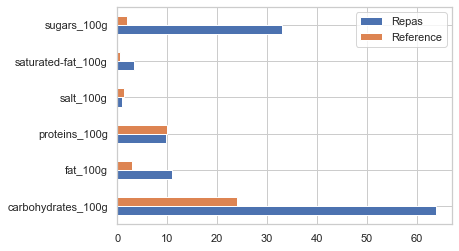

In [21]:
sns.set_color_codes("pastel")
sns.set(style="whitegrid")
data_metrics = pd.DataFrame({"Repas": metrics_brut, "Reference": reference})
data_metrics.plot.barh()
plt.show()


Affichage radar

Radar repas


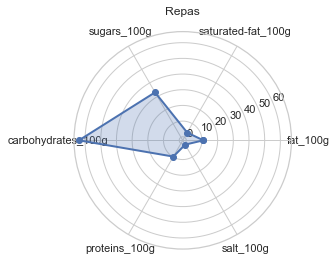

In [22]:
print('Radar repas')
utils.plot_radar(metrics_brut, columns, name="Repas")

Radar Référence


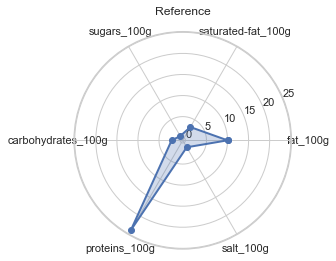

In [23]:
print('Radar Référence')
utils.plot_radar(reference, columns, name="Reference")


Repartition energétique

In [24]:

sample_c = utils.get_kcal(metrics_brut)
sample_c.describe()

count      3.000000
mean     185.213333
std      181.144209
min       38.840000
25%       83.920000
50%      129.000000
75%      258.400000
max      387.800000
dtype: float64

Repartition énergetique du repas

Camembert repas


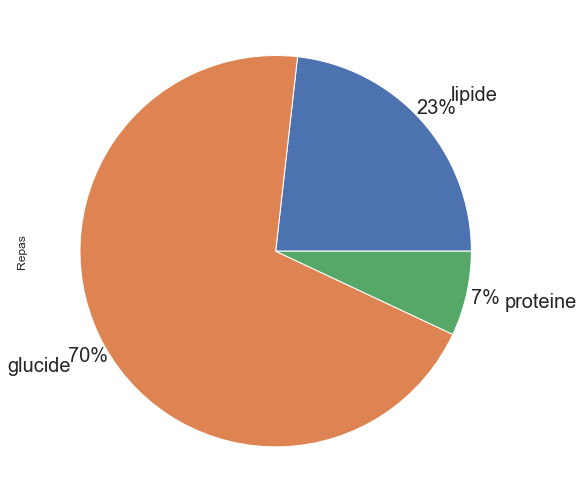

In [31]:
print("Camembert repas")
sample_c.plot.pie(label="Repas", autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, figsize=(18, 9), textprops={'fontsize': 20})

Réparition énergetique de la référence

Camembert référence


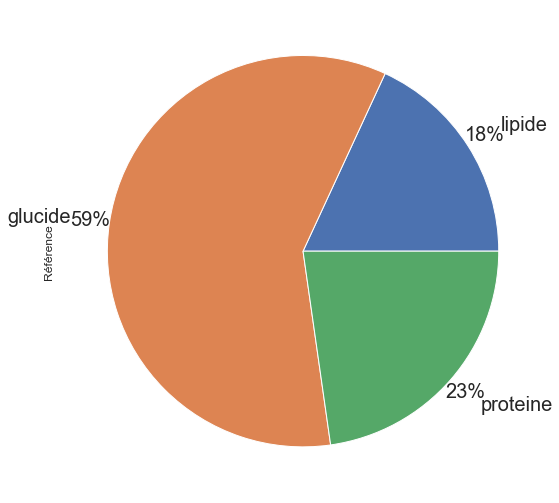

In [32]:
print("Camembert référence")
sample_ref_c = utils.get_kcal(reference)
sample_ref_c.plot.pie(label="Référence", autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, figsize=(18, 9), textprops={'fontsize': 20})